In [ ]:
import argparse
import logging
import time
import sys

import cv2
import numpy as np

from pose.estimator import TfPoseEstimator
from pose.networks import get_graph_path, model_wh

from utils.sort import Sort
from utils.actions import actionPredictor
from utils.joint_preprocess import *
from utils import common

import settings

import matplotlib.pyplot as plt

In [ ]:
# Load NN graph
w, h = model_wh('432x368')
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(w, h))
        
# Estimate human poses from a single image    
image = common.read_imgfile('./p1.jpg', None, None)
if image is None:
    logger.error('Image can not be read, path=%s' % image)
    sys.exit(-1)

In [ ]:
t = time.time()

In [ ]:
humans = e.inference(image)
elapsed = time.time() - t
print(elapsed)

In [ ]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

In [ ]:
fig = plt.figure()
a = fig.add_subplot(2,2,1)
a.set_title('Result')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)

a = fig.add_subplot(2,2,2)
plt.imshow(bgimg, alpha=0.5)
tmp = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()

In [ ]:
tmp2 = e.pafMat.transpose((2, 0, 1))
tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)

a = fig.add_subplot(2,2,3)
a.set_title('Vectormap-x')
plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()

In [ ]:
a = fig.add_subplot(2,2,4)
a.set_title('Vectormap-y')
plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()
plt.show()

In [ ]:
# Start over with detailed plotting
sys.modules[__name__].__dict__.clear()

In [1]:
import argparse
import logging
import time
import sys

import cv2
import numpy as np

from pose.estimator import TfPoseEstimator
from pose.networks import get_graph_path, model_wh

from utils.sort import Sort
from utils.actions import actionPredictor
from utils.joint_preprocess import *
from utils import common

import settings

import matplotlib.pyplot as plt

In [2]:
fps_time = 0
image = common.read_imgfile('./p1.jpg', None, None)
estimator = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))

In [3]:
type(image)
image.shape

(232, 217, 3)

In [4]:
tracker = Sort(settings.sort_max_age, settings.sort_min_hit)

In [5]:
print('tracker type is: ', type(tracker), '\n')

tracker type is:  <class 'utils.sort.Sort'> 



In [6]:
humans = estimator.inference(image)

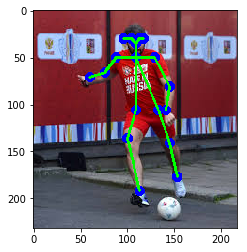

In [7]:
image_sk = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
#cv2.putText(image, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
#cv2.imshow('tf-pose-estimation result', image)
plt.imshow(cv2.cvtColor(image_sk, cv2.COLOR_BGR2RGB))

In [8]:
image_tk, joints, bboxes, xcenter, sk = TfPoseEstimator.get_skeleton(image, humans, imgcopy=False)
height = image_tk.shape[0]
width = image_tk.shape[1]
print(width, 'x', height)

217 x 232


In [9]:
bboxes = np.array(bboxes)
print('bboxes type is: ', type(bboxes), '\n', 'bboxes dim is: ', bboxes.shape, '\n')
print(bboxes, '\n')

#joints = np.array(joints)
print('joints type is: ', type(joints), '\n', 'joints dim is: ', len(joints[0]), '\n')
print(joints[0], '\n')

print('image_tk type is: ', type(image_tk), '\n')

print('xcenter type is: ', type(xcenter), '\n', 'xcenter dim is: ', len(xcenter), '\n')
print(xcenter[0], '\n')

print('sk type is: ', type(sk), '\n', 'sk dim is: ', sk.shape, '\n')


bboxes type is:  <class 'numpy.ndarray'> 
 bboxes dim is:  (1, 5) 

[[0.2764977  0.12931034 0.70506912 0.82758621 0.9999    ]] 

joints type is:  <class 'list'> 
 joints dim is:  18 

{0: (109, 35), 1: (109, 50), 2: (88, 50), 3: (76, 66), 4: (60, 71), 5: (129, 50), 6: (145, 81), 7: (141, 106), 8: (109, 106), 9: (100, 136), 10: (113, 192), 11: (133, 106), 12: (145, 141), 13: (153, 177), 14: (104, 30), 15: (113, 30), 16: (96, 30), 17: (117, 30)} 

image_tk type is:  <class 'numpy.ndarray'> 

xcenter type is:  <class 'list'> 
 xcenter dim is:  1 

109 

sk type is:  <class 'numpy.ndarray'> 
 sk dim is:  (232, 217, 3) 



In [10]:
# Skeleton enumeration mapping
def locate_skeleton(image, joints):
    for i in range(len(joints[0])):
        h = int(joints[0][i][0])
        w = int(joints[0][i][1])
        joint_loc = (h, w)
        image = cv2.putText(image, str(i), joint_loc, cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,255), 1, cv2.LINE_AA)
    plt.imshow(image)
    plt.savefig('locate_skeleton.jpg')

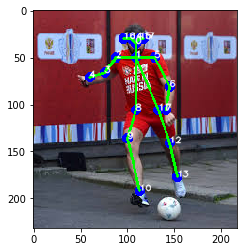

In [11]:
# To locate joints enumeration
locate_skeleton(cv2.cvtColor(image_sk, cv2.COLOR_BGR2RGB), joints)

In [12]:
result = np.array(bboxes)
det = result[:, 0:5]
print('width x height: ', width, 'x', height)
det[:, 0] = det[:, 0] * width
det[:, 1] = det[:, 1] * height
det[:, 2] = det[:, 2] * width
det[:, 3] = det[:, 3] * height
print(det)

width x height:  217 x 232
[[ 60.      30.     153.     192.       0.9999]]


In [13]:
print('tracker is: ', type(tracker))
trackers = tracker.update(det)
print('trackers are: ', type(trackers), ' with dim of: ', trackers.shape, '\n')
print(trackers)

tracker is:  <class 'utils.sort.Sort'>
trackers are:  <class 'numpy.ndarray'>  with dim of:  (1, 5) 

[[ 60.  30. 153. 192.   1.]]


In [14]:
xmin = int(trackers[0][0])
ymin = int(trackers[0][1])
xmax = int(trackers[0][2])
ymax = int(trackers[0][3])
label = int(trackers[0][4])
print(label)

1


In [15]:
j = np.argmin(np.array([abs(i - (xmax + xmin) / 2.) for i in xcenter]))
print(j)
det_joint = joint_filter(joints[j])
print('Detect joint: ', det_joint)
complete_joint = joint_completion(joint_completion(joints[j]))
print('Joints have been detected and completed: ', joints[j] is complete_joint)

0
Detect joint:  True
Joints have been detected and completed:  True


In [16]:
data = {}
data[label] = [joints[j]]
print(data[label])

[{0: (109, 35), 1: (109, 50), 2: (88, 50), 3: (76, 66), 4: (60, 71), 5: (129, 50), 6: (145, 81), 7: (141, 106), 8: (109, 106), 9: (100, 136), 10: (113, 192), 11: (133, 106), 12: (145, 141), 13: (153, 177), 14: (104, 30), 15: (113, 30), 16: (96, 30), 17: (117, 30)}]


In [17]:
pred = actionPredictor().move_status(data[label])
print(pred)
type(pred)

1


int

In [18]:
print(settings.move_status[pred])

stand
